# Importing required library's

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.ensemble import RandomForestRegressor

# Loading data

In [2]:
#loading data
file_1="Dataset/B0005_char_dataset.csv"
dataset=pd.read_csv(file_1)

# Corrections

In [3]:
#removing 170 th cycle it only has 5 rows in total
dataset=dataset.iloc[:541168]

#renaming columns for simplicity
dataset.columns=['cycle','voltage', 'current','temperature', 'current_charge', 'voltage_charge',"time"]
#removing discharge current rows/avoiding negative current
df=dataset[dataset["current"]>=0.02].reset_index(drop=True)

# converting time seconds->hour
df["time"]=df["time"]/3600

# Understanding

In [4]:
df["voltage"].describe()

count    506531.000000
mean          4.156229
std           0.098399
min           3.434644
25%           4.173178
50%           4.205399
75%           4.206028
max           4.313703
Name: voltage, dtype: float64

### voltage -Volt
### current -Amps
### Time    -hour

In [5]:
#max 2 Ah from dischrage dataset
C_max=2

# preprocessing
### Here we use columb counting method to make data frame

In [6]:
#calculate soc for each cycle
cycle_count=df["cycle"].unique()
soc_list=[]
# Update SOC for each reading within each cycle using Coulomb counting
for cycle in cycle_count:
    cycle_data = df[df['cycle'] == cycle]
    
    cumulative_soc = [0.0]
    
    for i in range(1, len(cycle_data)):
        
        delta_time = cycle_data['time'].iloc[i] - cycle_data['time'].iloc[i-1]
        
        delta_charge = cycle_data['current'].iloc[i] * delta_time
        
        cumulative_soc.append(cumulative_soc[-1] +delta_charge)
        
    soc_list.extend(cumulative_soc)
    
soc = [(q / C_max) for q in soc_list]

df["Soc"]=soc

### Selecting feature 

from the corelation Coefficent we can understahd the Soc is mostle depenednt on voltage and time
###### Here cycle is taken to seperate the datasets only

### Selecting training data and testing data

In [7]:
test_data=[40,41,50,60,70,80,90,100,110,120,130,140,150,160,169]
train_data=[x for x in cycle_count if x not in test_data]

train_data, test_data=train_test_split(cycle_count, test_size=0.3, random_state=0)
train_data.sort()
test_data.sort()

In [8]:
X_train = df[df['cycle'].isin(train_data)]
X_test = df[df['cycle'].isin(test_data)]

In [9]:
tp=['cycle','voltage', 'current','temperature', 'current_charge', 'voltage_charge',"time"]
#ip=["current_charge","time",'temperature',"Soc"]
ip=["current_charge","time",'temperature',"Soc"]
op="voltage_charge"
y_train=X_train.pop(op)
X_train=X_train[ip]

# Training model random forest regressor

In [10]:
#making models
rfr_model = RandomForestRegressor(n_estimators=100,random_state=0)
rfr_model.fit(X_train,y_train.values.ravel())

RandomForestRegressor(random_state=0)

In [11]:
def MAPE(y_true, y_pred): 
    Vm, Vbc = np.array(y_true), np.array(y_pred)
    return sum((abs(Vm-Vbc))/Vm)/len(Vm)

In [12]:
def soc_plot_rfr(cycle_no):
    # Filter data for the specified cycle
    cycle_data = df[df['cycle'] == cycle_no].copy()

    # Separate features (X) and target variable (y)
    X = cycle_data[ip]
    y = cycle_data[op]


    # Make predictions on the test set
    y_pred = rfr_model.predict(X)

    # Calculate mean squared error on the test set
    rmse = np.sqrt(metrics.mean_squared_error(y,y_pred ))
    mape = MAPE(y,y_pred)
    print(f'Root Mean Squared Error: {rmse}')
    print(f"MAPE : {mape}")
    
    # Plot the actual vs predicted SOC
    plt.figure(figsize=(5.1, 2.5))
    plt.xlim([0,1])
    plt.ylim([0,5])
    plt.grid(linestyle=' ')
    plt.ylabel(op)
    plt.xlabel('SOC')
    plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    plt.yticks([0,1,2,3,4,5])
    plt.scatter(X["Soc"] , y, color='red', label='Measured Terminal Voltage',s=10)
    plt.scatter(X["Soc"] , y_pred, color='blue', label='Predicted Terminal Voltage',s=1)
    plt.title(f'Random forest regressor_node(100) (Cycle {cycle_no})',fontweight="bold",fontsize="10")
    plt.legend(loc="lower right",fontsize="8")
    plt.show()

cycle no = 40
Root Mean Squared Error: 0.011510011759186293
MAPE : 0.0012321324619448965


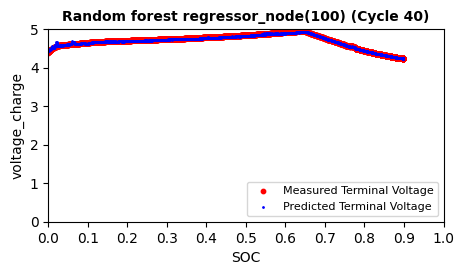

cycle no = 41
Root Mean Squared Error: 0.011053018935215457
MAPE : 0.0010387584193920262


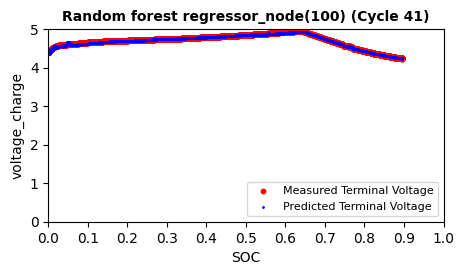

cycle no = 50
Root Mean Squared Error: 0.015262625054603754
MAPE : 0.0016696200502807328


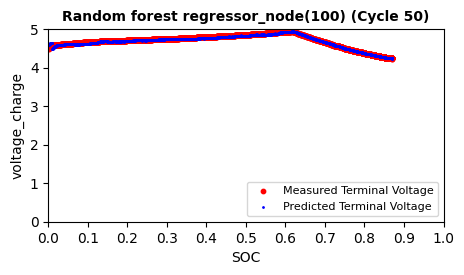

cycle no = 60
Root Mean Squared Error: 0.016777036309182165
MAPE : 0.0017322097858951232


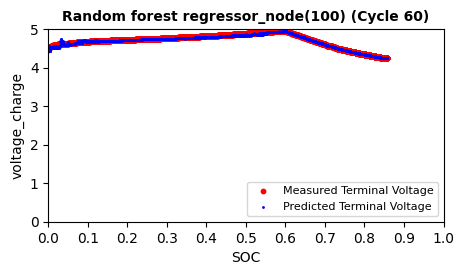

cycle no = 70
Root Mean Squared Error: 0.010862158524955536
MAPE : 0.0009211730275966735


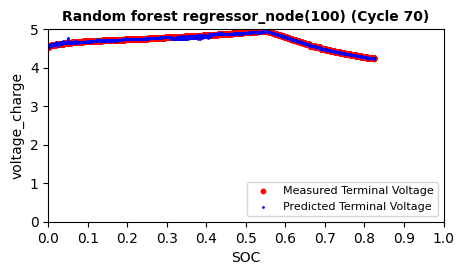

cycle no = 80
Root Mean Squared Error: 0.024322616208105646
MAPE : 0.002195077409354376


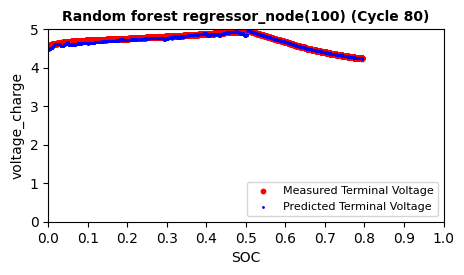

cycle no = 90
Root Mean Squared Error: 0.015773225502509404
MAPE : 0.0011191147192017546


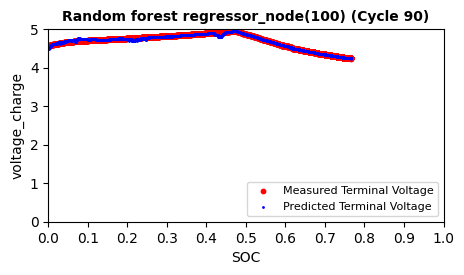

cycle no = 100
Root Mean Squared Error: 0.010786143517164407
MAPE : 0.0007293349757903216


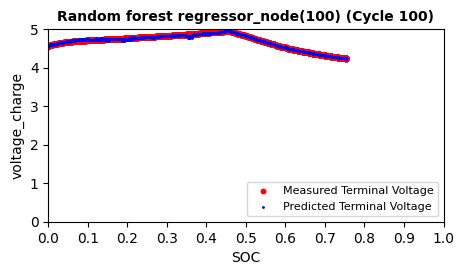

cycle no = 110
Root Mean Squared Error: 0.008720801677933473
MAPE : 0.0007263525386780399


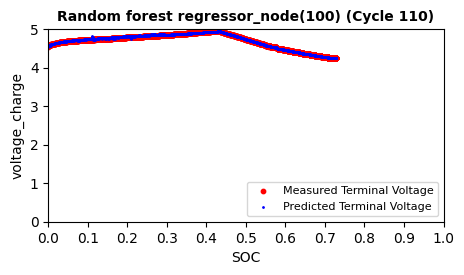

cycle no = 120
Root Mean Squared Error: 0.013222192806690748
MAPE : 0.001048248675685648


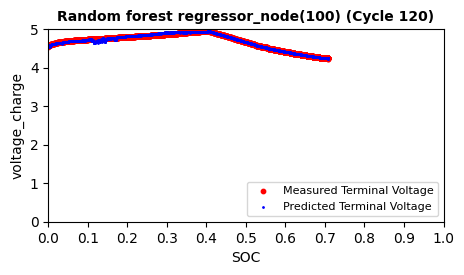

cycle no = 130
Root Mean Squared Error: 0.008657245351126408
MAPE : 0.0005939765523218909


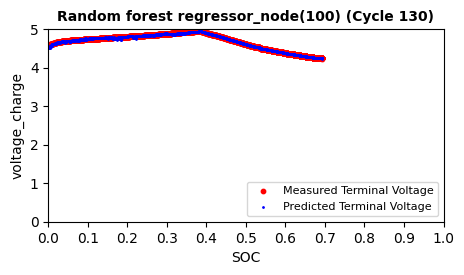

cycle no = 140
Root Mean Squared Error: 0.013047781582619612
MAPE : 0.0008654419065811208


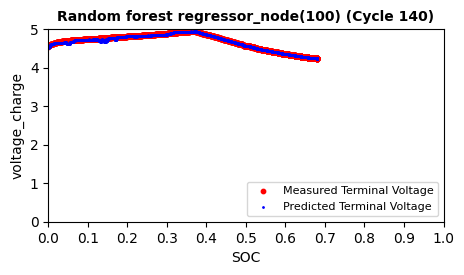

cycle no = 150
Root Mean Squared Error: 0.013446565895337909
MAPE : 0.0010394331010113082


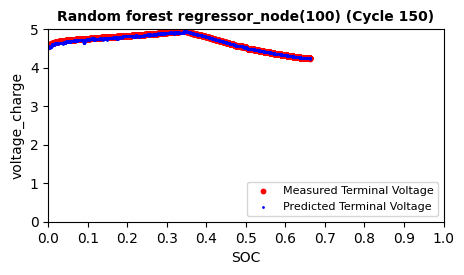

cycle no = 160
Root Mean Squared Error: 0.023182037854414094
MAPE : 0.0017192583356955091


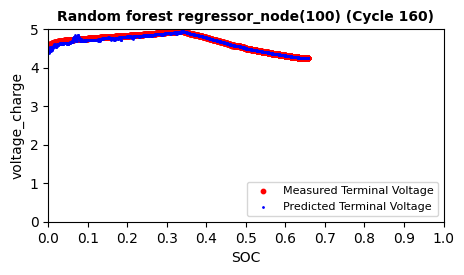

cycle no = 169
Root Mean Squared Error: 0.03764533385206375
MAPE : 0.0030575283568479534


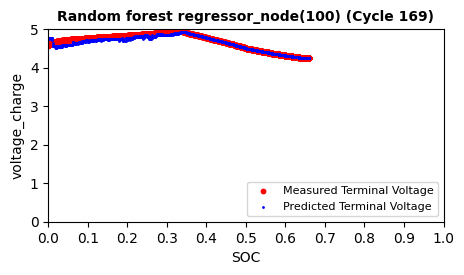

In [13]:
for i in test_data:
    print(f"cycle no = {i}")
    soc_plot_rfr(i)